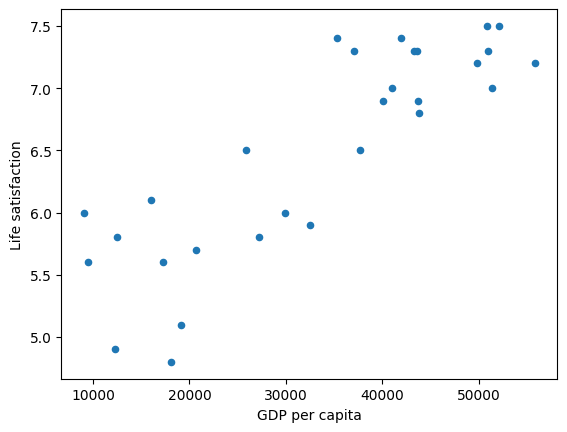

[[5.96242338]]
[[5.76666667]]


In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

oecd_bli = pd.read_csv('./datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('./datasets/lifesat/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

lr_model = sklearn.linear_model.LinearRegression()
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

lr_model.fit(X, y)
knn_model.fit(X, y)

X_new = [[22587]] # Cyprus' GDP per capita
print(lr_model.predict(X_new))
print(knn_model.predict(X_new))

### Exercises

<h5><b>1. How would you define Machine Learning?</b></h5>

Machine learning is a process where machine learns from data and identify inherent patterns in its structure without being explicitly programmed for specific tasks. Machine learning is like teaching computers to learn from experience, just like humans do. Instead of writing step-by-step instructions, you give the computer data, and it figures out patterns and makes decisions on its own. The more data it gets, the smarter it becomes at predicting outcomes or recognizing patterns.

Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.

<h5><b>2. Can you name four types of problems where it shines?</b></h5>

1) Regression<br>
Predicting continious values, such as forecasting stock prices or predicting house prices based on features like size and location.

2) Classification<br>
Categorizing data into predefined labels, like detecting span emails or identifying diseases from medical images.

3) Clustering<br>
Grouping similar data into data points together without predefined categories, such as customer segmentation in marketing or detecting different species of animals based on characteristics.

4) Anomaly detection<br>
Identifying unusual patterns in data, like spotting fraudulent credit card transactions or detecting faults in industrial machines.

<h5><b>3. What is a labeled training set?</b></h5>

A labeled training set is a collection of data where each input example is paired with its correct output (label).<br>
A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.

Components of the labeled training set
- Features (Inputs):
These are the attributes or characteristics of the data. For example, in a dataset about housing prices, features might include square footage, number of bedrooms, and location.

- Labels (Outputs):
These are the correct answers or target values the model is trying to learn. In the housing price example, the label would be the price of the house.

<h5><b>4. What are the two most common supervised tasks?</b></h5>

1. Regression<br>
Predicting a continuous numeric values based on input features.

2. Classification<br>
Predicting a discrete label or category for each input.

<h5><b>5. Can you name four common unsupervised tasks?</b></h5>

1. Clustering<br>
Grouping similar data points into clusters based on their features.

2. Dimensionality reduction<br>
Reducing the number of features in the dataset while retaining essential information.

3. Anomaly detection<br>
Identifying unusual data points that deviate from the norm. 

4. Association rule learning<br>
Discovering relationships between items in large dataset.

<h5><b>6. What type of algorithm would you use to allow a robot to walk in various unknown terrains?</b></h5>

Reinforcement learning

Robot could be considered as an agent acting in an environment by trial and error, receiving feedback (rewards and penalties) based on its acitons. In the case of walking on unknown terrains, the robot would explore different movement strategies, receive positive reinforcement for stable walking, and adjust its approach accordingly.

Key Algorithms:
- Q-Learning: A value-based method where the robot learns the best actions to take.
- Deep Q-Networks (DQN): Combines Q-learning with neural networks for handling complex environments.
- Policy Gradient Methods (like PPO or A3C): Directly learn optimal policies for continuous action spaces (important for dynamic and complex tasks like robot movement).

<h5><b>7. What type of algorithm would you use to segment your customers into multiple groups?</b></h5>

Clustering

Clustering doesn't require labeled data; it finds patterns and natural groupings within the data based solely on customer characteristics such as purchase history, demographics, or behavior

Common Algorithms:
- K-Means: One of the simplest and most popular clustering algorithms. It partitions customers into a pre-defined number of clusters based on feature similarities.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Effective for discovering clusters of varying shapes and identifying outliers.
- Hierarchical Clustering: Builds a hierarchy of clusters and is useful when the optimal number of clusters is unknown.

<h5><b>8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?</b></h5>

Supervised learning problem

Spam detection is a typical supervised learning problem: the algorithm is fedmany emails along with their label (spam or not spam).

Labeled data: In spam detection, you have a labeled dataset where each email is marked as either "spam" or "not spam." This allows the algorithm to learn from the examples and identify the patterns associated with each category<br>
Goal: The goal is to train a model to correctly classify new, unseen emails as spam or not, based on the patterns it learned from the labeled data.<br>

Common Algorithms for Spam Detection:
- Naive Bayes Classifier: Often used for text classification tasks like spam detection.
- Support Vector Machines (SVM): Can be used to separate spam and non-spam emails based on features.
- Random Forests or Decision Trees: Useful for capturing complex patterns in the data.

<h5><b>9. What is an online learning system?</b></h5>

Type of machine learning where the model is trained incrementally, processing data in small batches or even one data point at a time, typically in real-time. This allows the model to adapt continuously as new data becomes available

<h5><b>10. What is out-of-core learning?</b></h5>

Out-of-core learning refers to the process of training a model on data that doesn't fit entirely into memory. Instead of loading all the data at once, the model is trained on chunks or batches. When new data arrives, the model can update itself incrementally, without needing to retrain from scratch using the entire dataset.

Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer’s main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these minibatches

<h5><b>11. What type of learning algorithm relies on a similarity measure to make predictions?</b></h5>

Instance-based learning algorithm

An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions

Common Instance-based Algorithms:

1. K-Nearest Neighbors (K-NN):
- How it works: K-NN makes predictions by finding the K most similar instances in the training dataset (based on a distance or similarity metric like Euclidean distance) and uses the majority class or average of those instances to predict the label of a new data point.
- Similarity measure: Typically uses distance metrics like Euclidean distance, cosine similarity, or Manhattan distance to measure how close data points are to each other.

2. Case-Based Reasoning (CBR):
- How it works: This algorithm stores past problem-solving experiences (cases) and solves new problems by retrieving the most similar past case and adapting its solution accordingly.
- Similarity measure: Uses domain-specific metrics to assess how similar past cases are to the current problem.

<h5><b>12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?</b></h5>

Model parameters are values that are learned from the training data during the model's training process. These parameters directly define the model's behavior and are adjusted to minimize the error between the model's predictions and the true outcomes.

Hyperparameters, on the other hand, are set before the training process begins. They control the learning process itself, such as the learning rate, number of iterations, or model complexity. They are not learned from the data but need to be tuned to optimize model performance.

In short: Model parameters are learned from the data, while hyperparameters are pre-defined settings that govern the learning process.


<h5><b>13. What do model-based learning algorithms seach for? What is the most common strategy they use to succeed? How do they make predictions?</b></h5>

Model-based learning algorithms search for the optimal value for the model parameters that minimize a cost function (also called a loss function). The cost function quantifies how well the model’s predictions match the actual target values, with the goal of finding the set of parameters that results in the smallest possible difference (error).

The most common strategy used by model-based learning algorithmsis is **optimization**, where the algorithm adjusts the model's parameters tnrough iterative methods (like gradient descent) to minimize the cost function.

Once the model has learned the best parameters (i.e., after training), it makes predictions by applying these parameters to new data and using the learned function to calculate the output.

<h5><b> 14. Can you name four of the main challenges in Machine Learning?</b></h5>

Insuffient quantity of training data<br>
Nonrepresentative training data<br>
Poor-quality data<br>
Irrelevant features<br>
Overfitting the training data<br>
Underfitting the training data<br>

<h5><b>15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?</b></h5>

**Overfitting** occurs when the model learns not just the underlying patterns in the training data but also the noise, outliers, or random fluctuations. This makes the model very specific to the training data, so while it performs well on that data, it struggles to generalize to new, unseen data.

Possible Solutions:

1. Use More Training Data:
More data can help the model learn more general patterns and reduce its tendency to memorize the training examples. Larger datasets give the model a better chance of finding meaningful, robust features that generalize well.<br>

2. Apply Regularization
Regularization techniques (like L1 or L2 regularization) add a penalty to the model for large weights, encouraging it to find simpler, more generalizable patterns. Regularization helps to prevent the model from fitting the noise in the data.

3. Simplify the Model
Reduce model complexity by using fewer features, reducing the depth of decision trees, or using a simpler model (e.g., a linear model instead of a complex neural network). A simpler model is less likely to overfit the data because it has fewer parameters to tune.

4. Reducing the noise in the training data

##### **16. What is a test set and why would you want to use it?**

A test set is a subset of your dataset that is separated from the training data and is used to evaluate the performance of your model after it has been trained. The primary goal of using a test set is to assess how well the model generalizes to new, unseen data.

Why Use a Test Set?

1. Evaluate Generalization:
The test set is used to simulate how the model will perform in real-world scenarios where the data is not seen during training. It gives an estimate of the model’s performance on new data, which helps assess its generalization ability.

2. Avoid Overfitting:
By holding out the test set during training, you ensure that the model does not learn or "memorize" the test data. If you were to use the test set during training (for instance, in hyperparameter tuning), you risk data leakage and overfitting, where the model's performance looks artificially good on the test set but poorly generalizes to real-world data.

3. Benchmark the Model:
The test set serves as a final benchmark for comparing different models or algorithms, helping you determine which model performs best based on its ability to generalize to new data.

##### **17. What is the purpose of a validation set?**

A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.

The purpose of a validation set is to tune hyperparameters and select the best model during the training process without using the test set. It acts as a proxy for new, unseen data, helping you optimize your model's performance before evaluating it on the test set.

Key Purposes of a Validation Set:

1. Hyperparameter Tuning:
The validation set is used to evaluate the model's performance for different hyperparameter values (like learning rate, number of trees, etc.) and select the hyperparameters that produce the best results. By using the validation set, you can adjust these parameters to avoid overfitting or underfitting.

2. Model Selection:
During model training, you may try different algorithms or architectures (for example, trying a decision tree vs. a random forest, or experimenting with different neural network configurations). The validation set helps you compare how different models perform and choose the one that works best for your data.

3. Early Stopping:
In some cases (e.g., deep learning), the validation set is used for early stopping. If the model's performance on the validation set starts to degrade while still improving on the training set, it signals that overfitting is happening, and training can be stopped early to prevent the model from overfitting.

How It Works:
The data is typically split into three parts: training set, validation set, and test set.
- The **training set** is used to train the model.
- The **validation set** is used to evaluate the model's performance during training, allowing for hyperparameter adjustments or model selection.
- The **test set** is used to evaluate the final model after training is complete.

##### **18. What can go wrong if you tune hyperparameters using the test set?**

If you use the test set to tune hyperparameters, several things can go wrong, leading to misleading results and ultimately a model that doesn't generalize well to real-world data. Here's what can happen:

1. Data Leakage:
- What it is: Using the test set to tune hyperparameters means the model gets indirect access to information about the test set during training, which is a form of data leakage.
- Consequences: The model becomes too tailored to the test data, which artificially inflates its performance on the test set. This leads to an overestimation of how well the model will perform in real-world situations where the exact data is not available.
2. Overfitting the Test Set:
- What it is: By adjusting hyperparameters based on the test set, the model starts to memorize the test set, treating it as part of the training process.
- Consequences: This causes the model to overfit the test data, meaning it won't generalize well to new, unseen data. Essentially, the model becomes too specific to the test set, losing its ability to perform well on new data outside of the training/testing split.
3. Invalid Performance Evaluation:
- What it is: If the test set is used in model selection or hyperparameter tuning, it no longer serves as an unbiased measure of model performance.
- Consequences: The test set should only be used to evaluate the final model after all training and tuning are completed. Using it prematurely means your model's true performance remains unmeasured, as it's been influenced by the test set.

##### **19. What is cross-validation and why would you prefer it to a validation set?**

Cross-validation is a technique that makes it possible to compare models (for model selection and hyperparameter tuning) without the need for a separate validation set. This saves precious training data.

Cross-validation is a technique used to assess the performance of a machine learning model by dividing the dataset into multiple subsets or folds. The model is trained on some of these folds and tested on the remaining fold(s). This process is repeated multiple times, with each fold being used as the validation set once.

The most common type is k-fold cross-validation, where the dataset is split into k folds (typically 5 or 10). The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold serving as the test set once.

**Why Would You Prefer Cross-Validation to a Validation Set?**

1. Better Use of Data:
- Validation Set: In a standard train-validation-test split, a portion of the data is held out for validation, meaning the model only gets to use part of the data for training.
- Cross-Validation: With cross-validation, the model gets to train and validate on every data point in the dataset. This is particularly helpful when working with smaller datasets, as it allows the model to leverage all available data for both training and validation.

2. More Reliable Performance Estimates:
- Validation Set: A single validation set may not be representative of the whole dataset, especially if the data is small or imbalanced. This can lead to performance estimates that are not reliable or representative of the model's generalization ability.
- Cross-Validation: By using multiple different training and validation sets (through different folds), cross-validation provides a more robust and reliable estimate of how the model will perform on unseen data. The average performance across all folds gives a better picture of its true performance.

3. Helps Avoid Overfitting or Underfitting:
- Validation Set: A single validation set might not fully reflect the model's tendency to overfit or underfit, especially if the validation set is not well-representative of the general population.
- Cross-Validation: Since cross-validation tests the model across multiple different splits of the data, it can help better detect if the model is overfitting (i.e., performing very well on certain folds but poorly on others) or underfitting (i.e., consistently performing poorly on all folds).

4. More Consistent Hyperparameter Tuning:
- Validation Set: If you rely on just one validation set, your hyperparameter tuning might be based on a single, potentially unrepresentative subset of the data.
- Cross-Validation: With cross-validation, hyperparameters are tuned based on average performance across all folds, which leads to a more reliable and consistent selection of hyperparameters.